Goals:
- Refamiliarize myself with Python and Jupyter Notebooks
- Use Pandas to build a model, identify an insight, and create a visualization.

In [1]:
# Initial Setup
# Import Libraries and Set Alias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data into a Dataframe
df = pd.read_csv("Pandas Mini-Data Analysis/StudentsPerformance.csv")
df.head()

Matplotlib is building the font cache; this may take a moment.


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


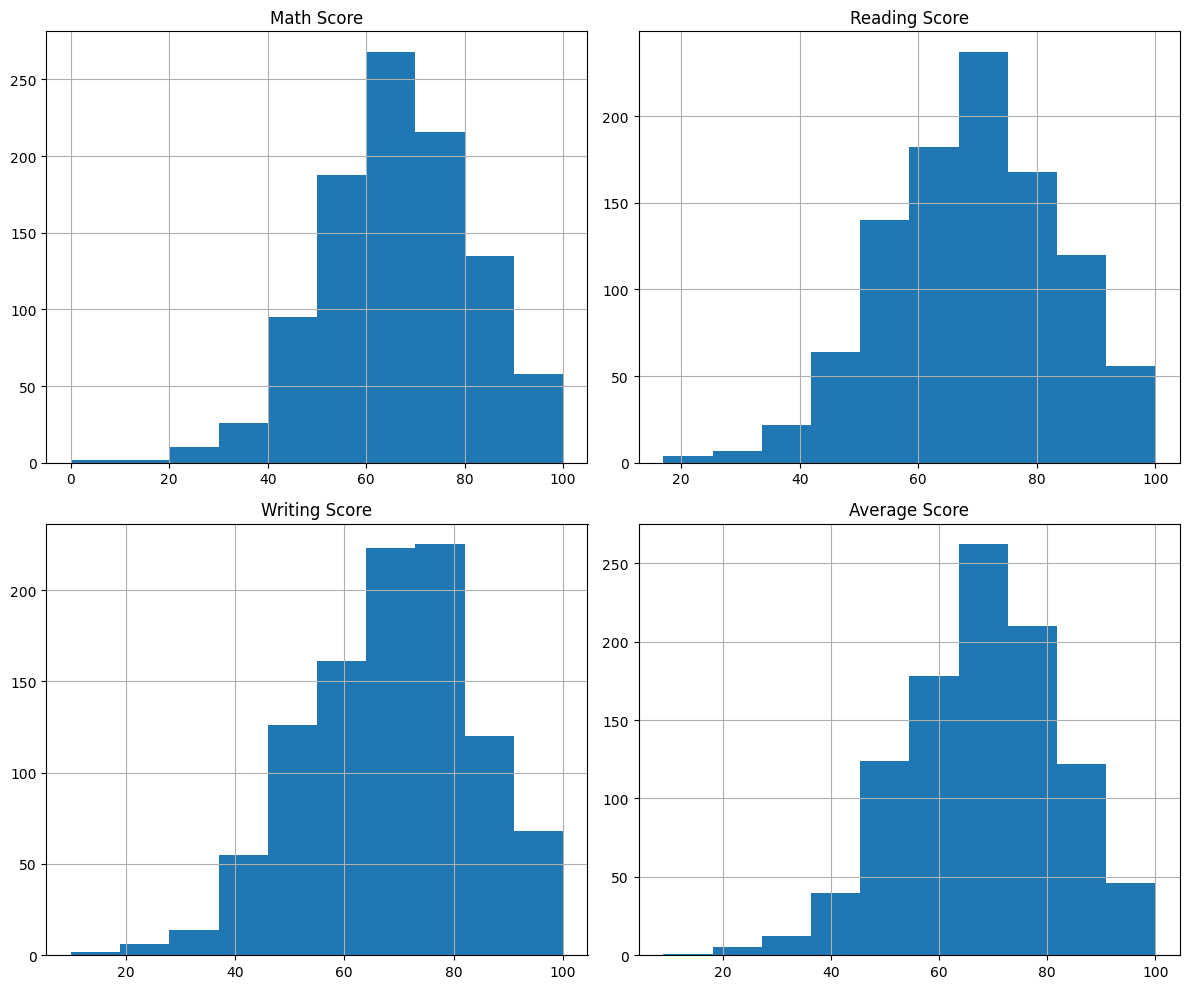

In [2]:
# Data Exploration
"""
I'm interested in how the other variables affect the math, reading, writing, and average scores.
Let's calculate the average score and then visualize the distribution of the scores.
"""
# Calculate Average Score
df['average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

# Exploring the Scores
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
df['math score'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Math Score')
df['reading score'].hist(ax=axes[0, 1])
axes[0, 1].set_title('Reading Score')
df['writing score'].hist(ax=axes[1, 0])
axes[1, 0].set_title('Writing Score')
df['average score'].hist(ax=axes[1, 1])
axes[1, 1].set_title('Average Score')
plt.tight_layout()
plt.show()

In [3]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [4]:
# Exploring the Independent Variables
display(pd.DataFrame(df['gender'].value_counts()))
display(pd.DataFrame(df['race/ethnicity'].value_counts()))
display(pd.DataFrame(df['lunch'].value_counts()))
display(pd.DataFrame(df['test preparation course'].value_counts()))

,count
gender,
female,518
male,482


,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


,count
lunch,
standard,645
free/reduced,355


,count
test preparation course,
none,642
completed,358


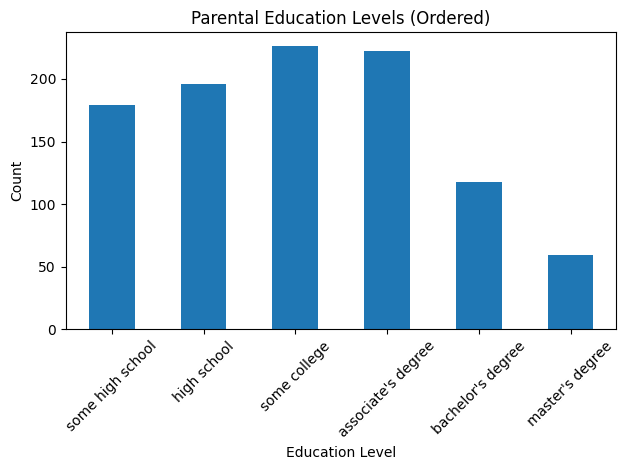

In [5]:
# Define the order for ordinal variables
order = ['some high school', 'high school', 'some college', 
         'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
# Count and reindex in order
counts = df['parental level of education'].value_counts().reindex(order)
counts.plot(kind='bar')
plt.title('Parental Education Levels (Ordered)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# 1. Summary Statistics by Categorical Variables
print("=== Average Scores by Category ===\n")

print("By Gender:")
print(df.groupby('gender')['average score'].mean().sort_values(ascending=False))
print()

print("By Race/Ethnicity:")
print(df.groupby('race/ethnicity')['average score'].mean().sort_values(ascending=False))
print()

print("By Parental Education:")
print(df.groupby('parental level of education')['average score'].mean().sort_values(ascending=False))
print()

print("By Lunch Type:")
print(df.groupby('lunch')['average score'].mean().sort_values(ascending=False))
print()

print("By Test Preparation:")
print(df.groupby('test preparation course')['average score'].mean().sort_values(ascending=False))

=== Average Scores by Category ===

By Gender:
gender
female    69.569498
male      65.837483
Name: average score, dtype: float64

By Race/Ethnicity:
race/ethnicity
group E    72.752381
group D    69.179389
group C    67.131661
group B    65.468421
group A    62.992509
Name: average score, dtype: float64

By Parental Education:
parental level of education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939
Name: average score, dtype: float64

By Lunch Type:
lunch
standard        70.837209
free/reduced    62.199061
Name: average score, dtype: float64

By Test Preparation:
test preparation course
completed    72.669460
none         65.038941
Name: average score, dtype: float64


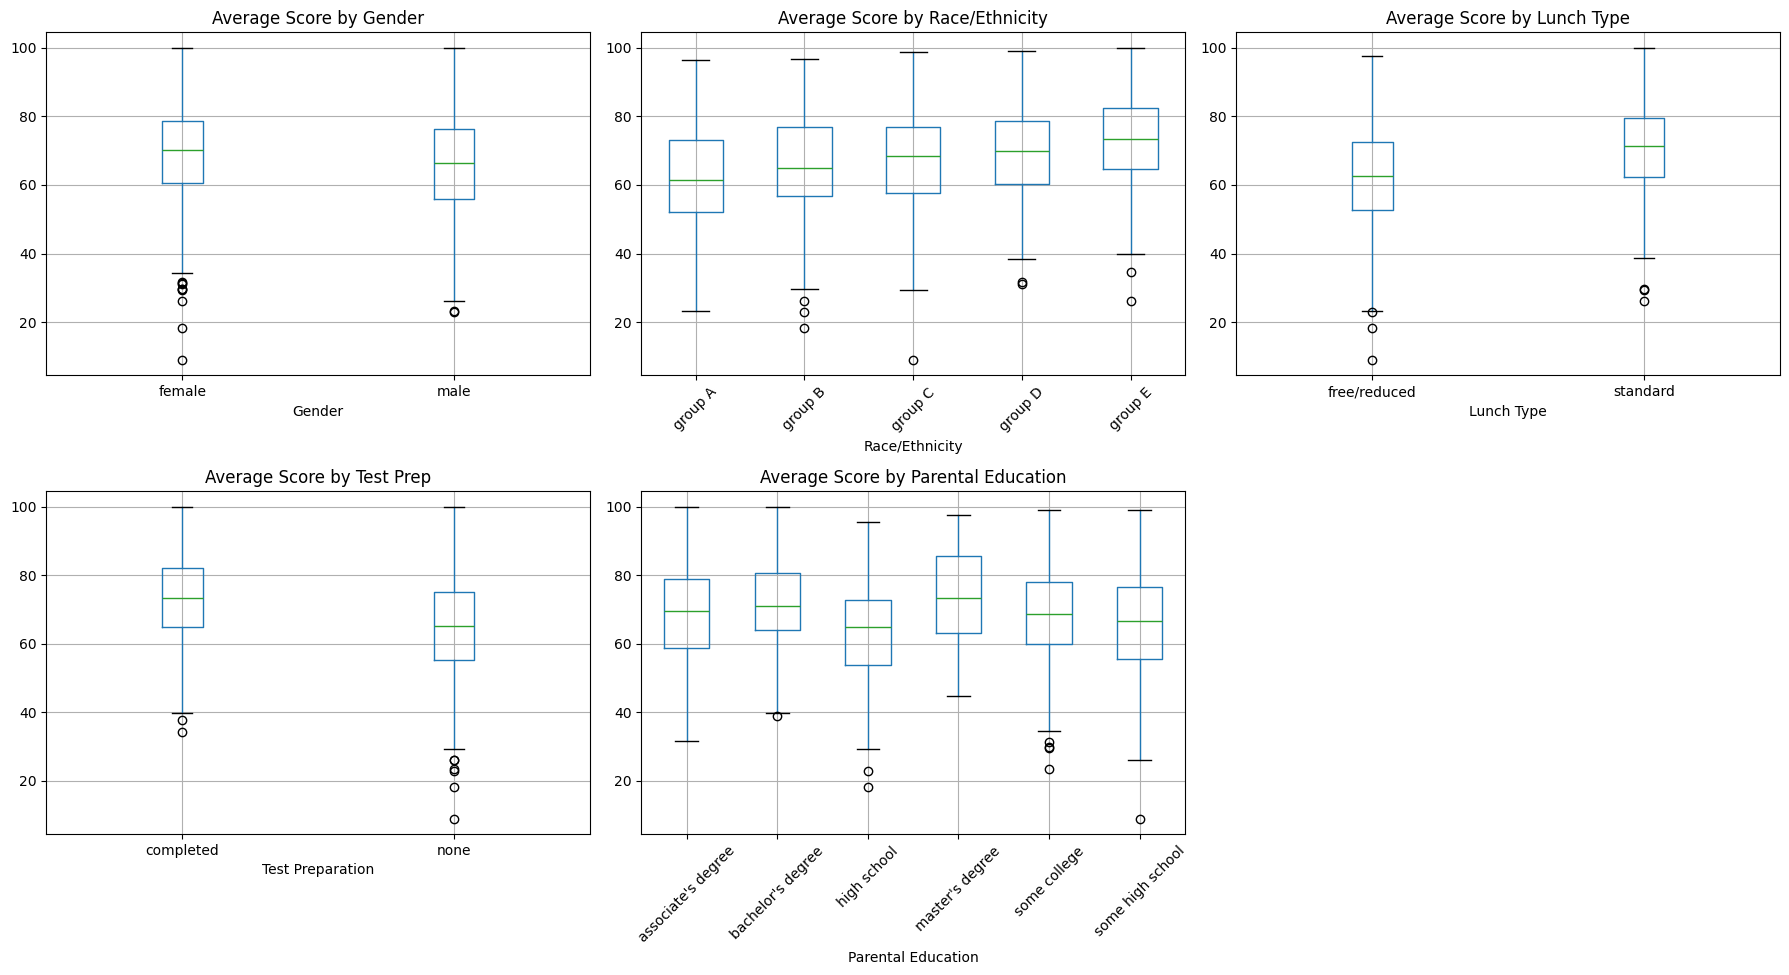

In [7]:
# Box plots to compare distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gender
df.boxplot(column='average score', by='gender', ax=axes[0, 0])
axes[0, 0].set_title('Average Score by Gender')
axes[0, 0].set_xlabel('Gender')

# Race/Ethnicity
df.boxplot(column='average score', by='race/ethnicity', ax=axes[0, 1])
axes[0, 1].set_title('Average Score by Race/Ethnicity')
axes[0, 1].set_xlabel('Race/Ethnicity')
axes[0, 1].tick_params(axis='x', rotation=45)

# Lunch
df.boxplot(column='average score', by='lunch', ax=axes[0, 2])
axes[0, 2].set_title('Average Score by Lunch Type')
axes[0, 2].set_xlabel('Lunch Type')

# Test Prep
df.boxplot(column='average score', by='test preparation course', ax=axes[1, 0])
axes[1, 0].set_title('Average Score by Test Prep')
axes[1, 0].set_xlabel('Test Preparation')

# Parental Education
df.boxplot(column='average score', by='parental level of education', ax=axes[1, 1])
axes[1, 1].set_title('Average Score by Parental Education')
axes[1, 1].set_xlabel('Parental Education')
axes[1, 1].tick_params(axis='x', rotation=45)

# Hide the last subplot
axes[1, 2].axis('off')

plt.suptitle('')  # Remove the default title
plt.tight_layout()
plt.show()

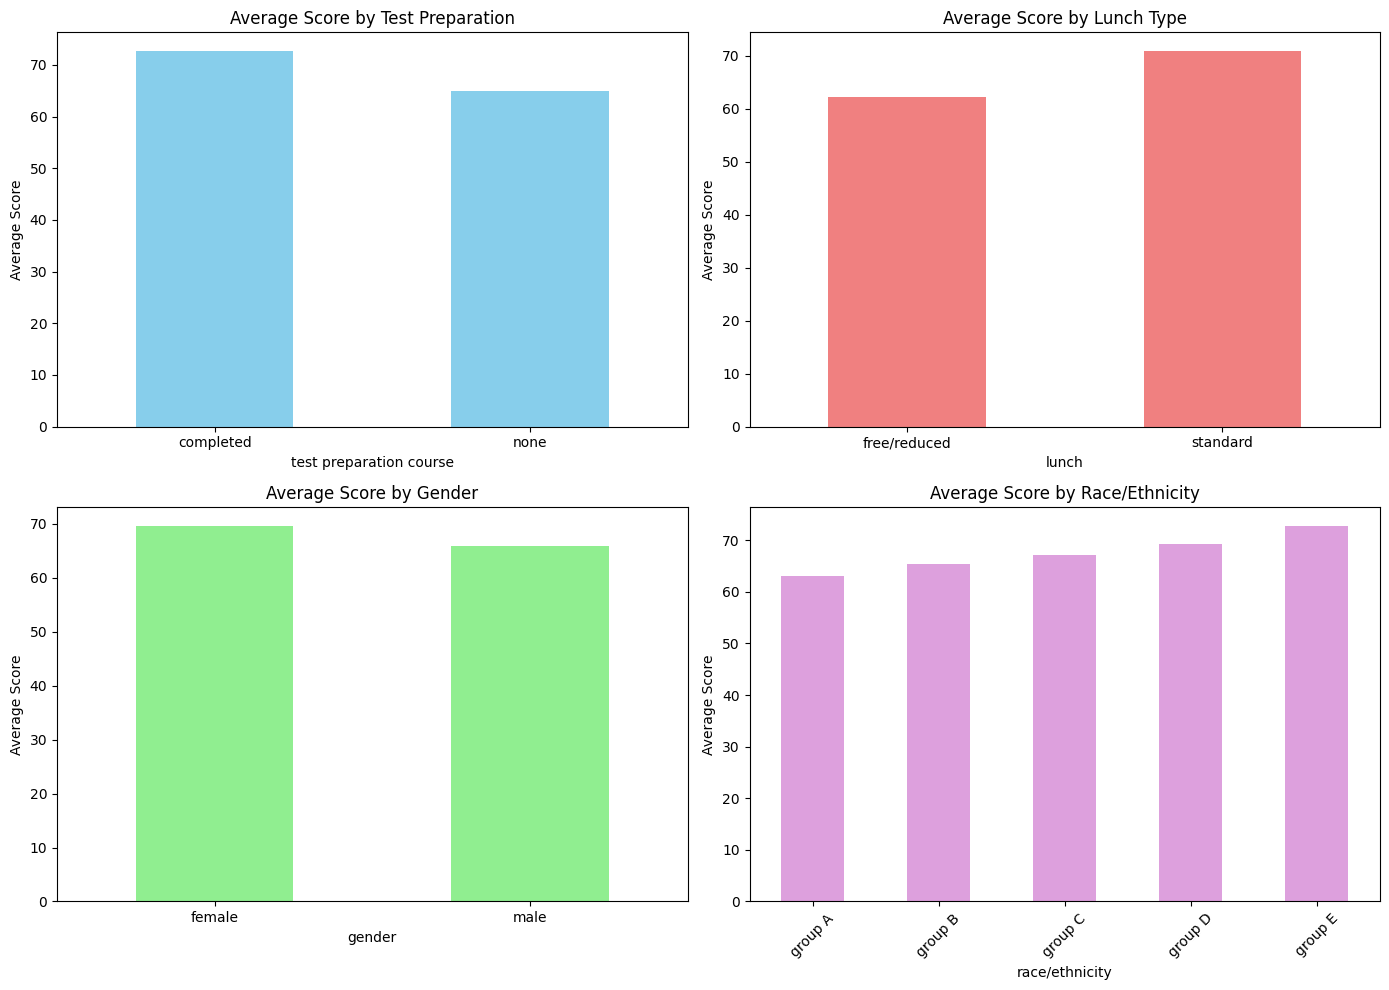

In [8]:
# Mean scores by category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Test Preparation
df.groupby('test preparation course')['average score'].mean().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Score by Test Preparation')
axes[0, 0].set_ylabel('Average Score')
axes[0, 0].tick_params(axis='x', rotation=0)

# Lunch Type
df.groupby('lunch')['average score'].mean().plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Average Score by Lunch Type')
axes[0, 1].set_ylabel('Average Score')
axes[0, 1].tick_params(axis='x', rotation=0)

# Gender
df.groupby('gender')['average score'].mean().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Average Score by Gender')
axes[1, 0].set_ylabel('Average Score')
axes[1, 0].tick_params(axis='x', rotation=0)

# Race/Ethnicity
df.groupby('race/ethnicity')['average score'].mean().plot(kind='bar', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Average Score by Race/Ethnicity')
axes[1, 1].set_ylabel('Average Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# Look at multiple variables together
print("=== Combined Effects ===\n")

# Test Prep + Lunch
print("Average Score by Test Prep and Lunch Type:")
print(df.pivot_table(values='average score', 
                     index='test preparation course', 
                     columns='lunch', 
                     aggfunc='mean'))
print()

# Gender + Test Prep
print("Average Score by Gender and Test Prep:")
print(df.pivot_table(values='average score', 
                     index='gender', 
                     columns='test preparation course', 
                     aggfunc='mean'))

=== Combined Effects ===

Average Score by Test Prep and Lunch Type:
lunch                    free/reduced   standard
test preparation course                         
completed                   67.755725  75.505140
none                        58.949405  68.302233

Average Score by Gender and Test Prep:
test preparation course  completed       none
gender                                       
female                   74.454710  66.878244
male                     70.781609  63.044372


In [10]:
# Encode categorical variables to see correlations
df_encoded = df.copy()
df_encoded['gender_num'] = (df['gender'] == 'female').astype(int)
df_encoded['lunch_num'] = (df['lunch'] == 'standard').astype(int)
df_encoded['test_prep_num'] = (df['test preparation course'] == 'completed').astype(int)

# Calculate correlations
correlations = df_encoded[['gender_num', 'lunch_num', 'test_prep_num', 'average score']].corr()
print("\n=== Correlations with Average Score ===")
print(correlations['average score'].sort_values(ascending=False))


=== Correlations with Average Score ===
average score    1.000000
lunch_num        0.290064
test_prep_num    0.256710
gender_num       0.130861
Name: average score, dtype: float64


Conclusions:
- Lunch, Test Prep have large positive correlations with average scores.
- Females score slightly better.
Potential Steps:
- Potential for Scatterplots between the three types of tests.
- Principal Component Analysis
- Try Machine Learning like Random Forest
Limitations:
- No check for correlation between independent variables.
- No Train / Test Split
- Not all variables were examined.
- Correlation Not Causation
Learnings
- Refamiliarized Self with Python and Jupyter
- Scope Creep with AI Generation.
- Repeated Work due to AI code generation.
- Large Amount of Technical Debt to Clean and Compress the Code

Sources:
- https://www.kaggle.com/datasets/sadiajavedd/students-academic-performance-dataset?resource=download

AI Disclosure: (Claude)
- Used to generate ideas for potential projects.
- Used to generate cells 6 to 10.
https://claude.ai/share/ef6b8a74-dd36-4ded-a146-ba756aefb166